In [1]:
from pandas import *
import numpy as np 
import matplotlib.pyplot as plt
import pykrige.kriging_tools as kt
from pykrige.uk import UniversalKriging
from pykrige.ok import OrdinaryKriging

In [2]:
data = read_csv("merged.csv")

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'linear' Variogram Model
Slope: 3.30115150130376
Nugget: 2.9945778183128997 

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



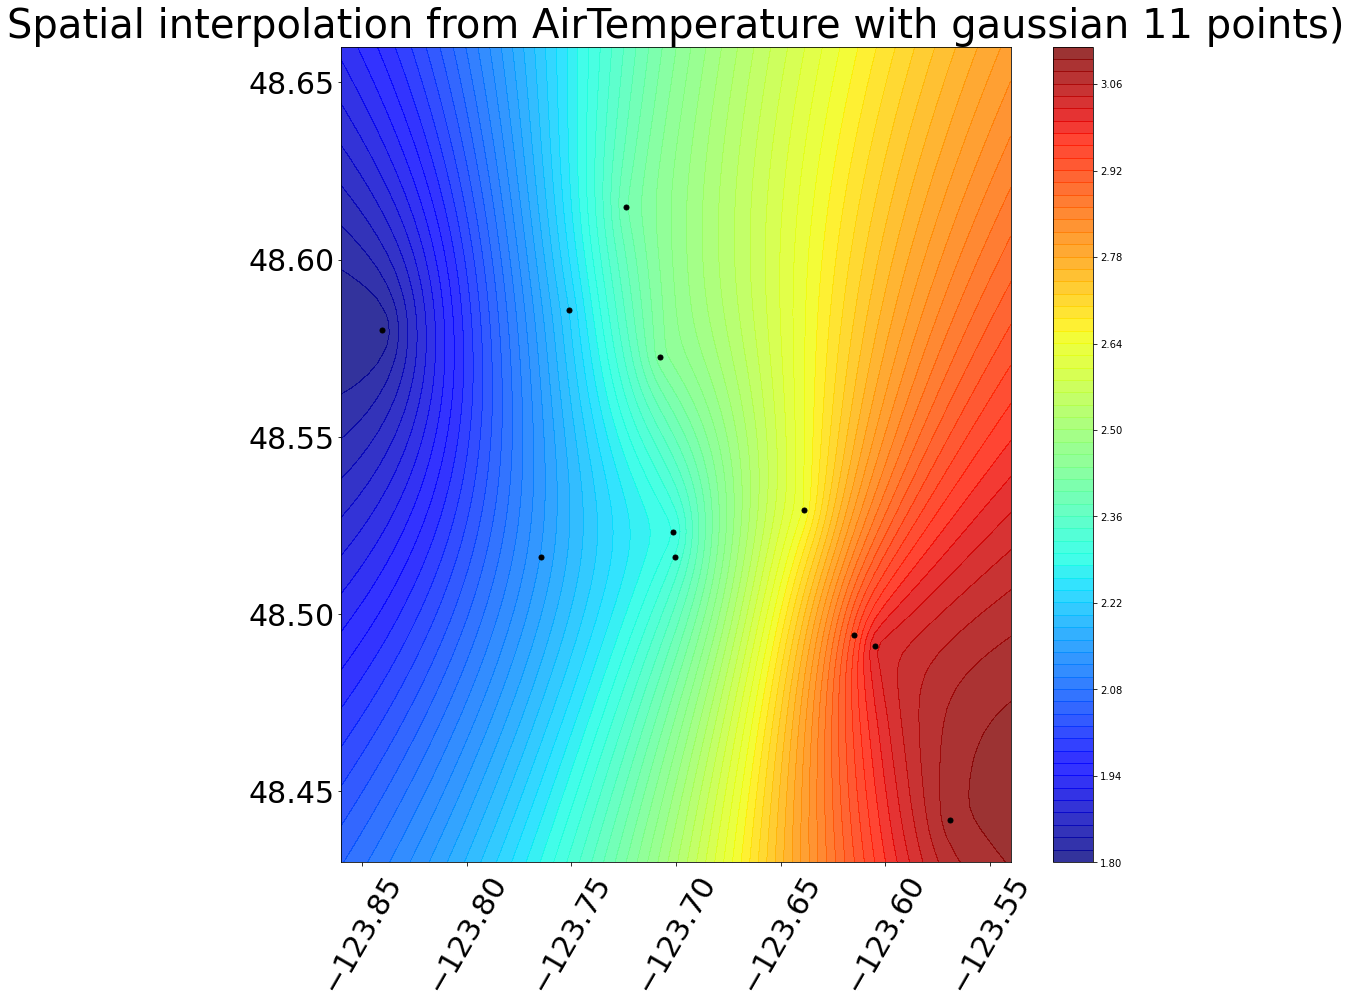

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'linear' Variogram Model
Slope: 429.71574066257165
Nugget: 70.89526210470456 

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



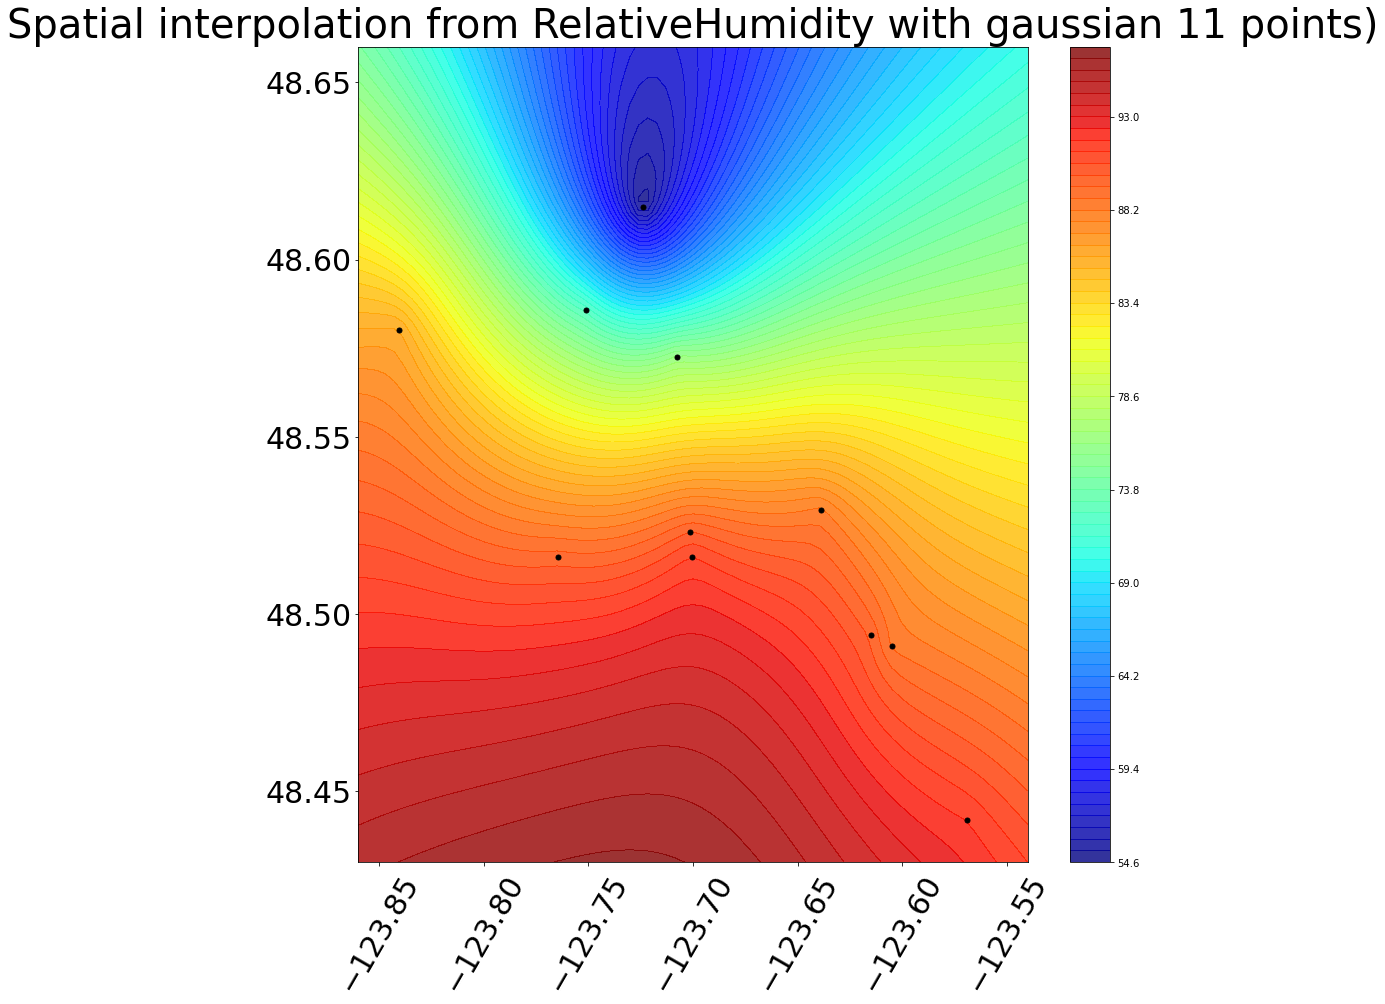

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'linear' Variogram Model
Slope: 296.4733175672463
Nugget: 5.804152055126138 

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



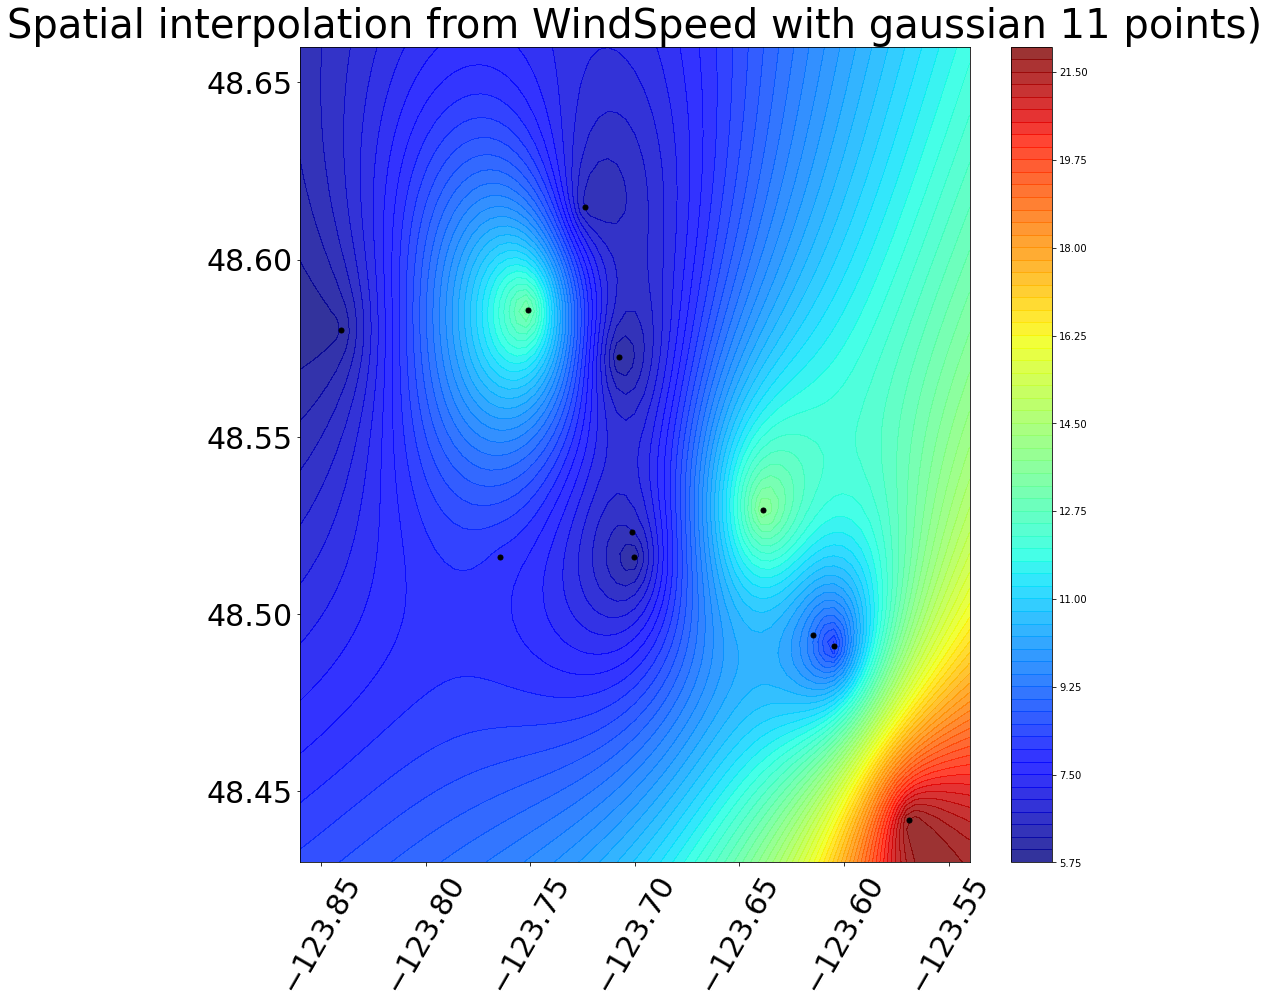

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'linear' Variogram Model
Slope: 3.855693805681834e-10
Nugget: 2.343739410866952 

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



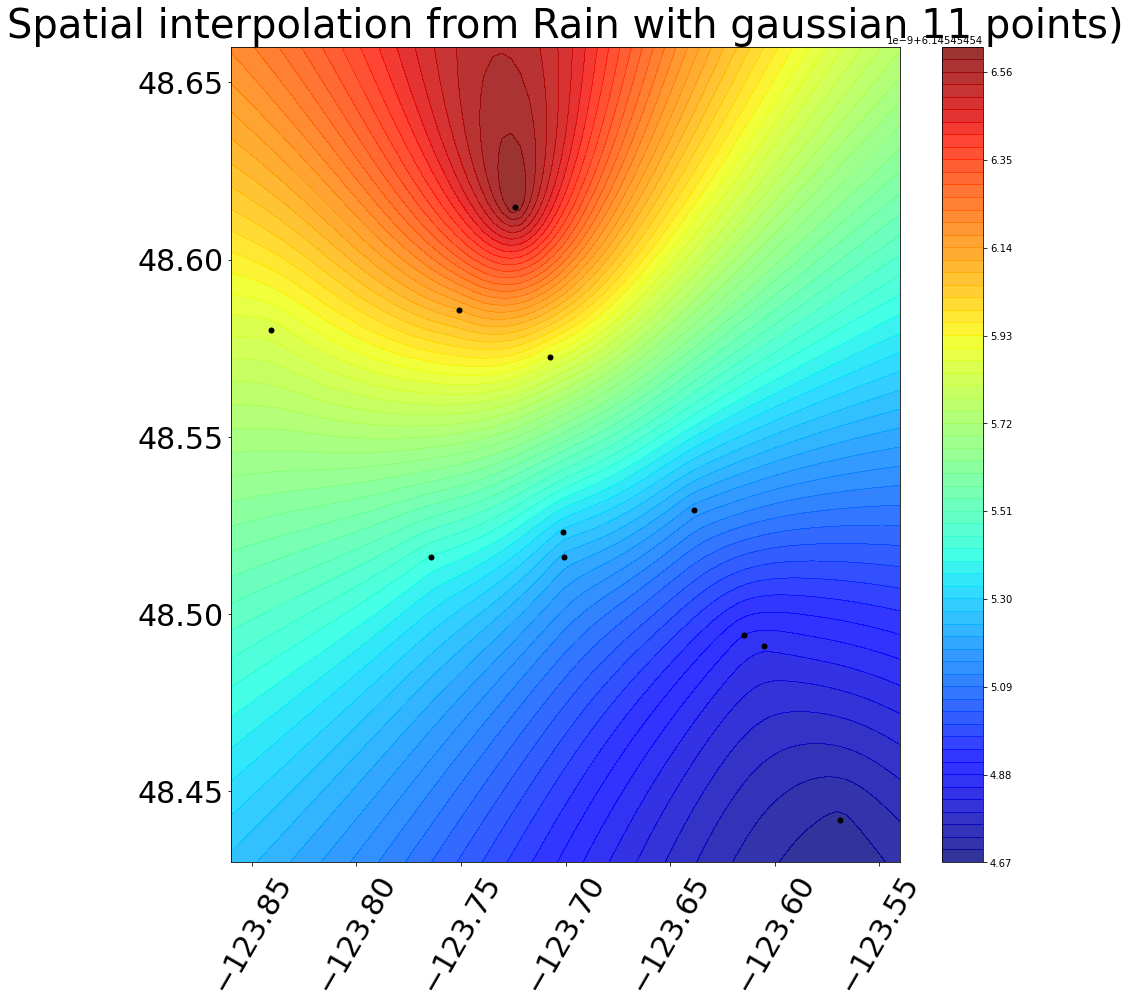

In [60]:
var = ['AirTemperature','RelativeHumidity','WindSpeed', 'Rain']
for i in var:
    lons = np.array(data['Stn_long'])
    lats = np.array(data['Stn_lat'])
    zdata = np.array(data[i])

    ymin = 48.44-0.01
    ymax = 48.65+0.01

    xmin = -123.85-0.01
    xmax = -123.55+0.01

    grid_lon = np.linspace(xmin, xmax, 75)
    grid_lat = np.linspace(ymin, ymax, 75)

    OK = OrdinaryKriging(lons, lats, zdata, variogram_model='linear', verbose=True, enable_plotting=False,nlags=20)
    z1, ss1 = OK.execute('grid', grid_lon, grid_lat)
    #print (z1)

    xintrp, yintrp = np.meshgrid(grid_lon, grid_lat) 
    fig, ax = plt.subplots(figsize=(15,15))


    #ax.scatter(lons, lats, s=len(lons), label='Input data')

    contour = plt.contourf(xintrp, yintrp, z1,len(z1),cmap=plt.cm.jet,alpha = 0.8) 


    plt.colorbar(contour)




    npts = len(lons)

    plt.scatter(lons, lats,marker='o',c='k', s = 25)


    plt.xticks(fontsize = 30, rotation=60)
    plt.yticks(fontsize = 30)

    #Tempreture
    plt.title(f'Spatial interpolation from {i} with gaussian {npts} points)',fontsize = 40)
    plt.show()